The Enhanced Natural Terrain Landslide Inventory(ENTLI is a historical record of more than 100 000 observations and 14 features that has data from 1924 to 2019 of aerial photographs taken of hillsides and slopes. It includes locations of indentified landslides in latitudes and longitudes as well as other associated data for each landslide.
   - `slide_type:` classification of landslide
   - `m_width:` width of landslide main scarp(metres)
   - `s_length:` length of landslide source area(metres)
   - `slope:` ground slope angle across the landslide head
   - `cover:` vegetation cover within the landslide source
   - `year_1:` year of the aerial photograph on which the landside first observed.
   - `headelev:` elevation of landslide crown in mPD
   - `tailelev:` elevation of landslide toe in mPD.
   - `ele_diff:` elevation difference between landslide crown and toe in metre.
   - `gully:` "Y" when landslide is within a previously recorded area of gully erosion and "N" for when landslide is located outside of such areas
   - `class:` classification of relict landslide
   - `ENTLI_NO:` ENTLI number
   - `northing:` latitude coordinates
   - `easting:` longitude coordinates

In [1]:
#import all packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read the file into a geodataframe
landslide_data = gpd.read_file('a0000000a.gdbtable')

In [3]:
landslide_data.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,Shape_Length,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,16.246627,"MULTILINESTRING ((829062.359 842154.705, 82904..."
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,13.765049,"MULTILINESTRING ((829176.866 842509.808, 82917..."
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,16.192822,"MULTILINESTRING ((827401.228 842230.476, 82738..."
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,22.423121,"MULTILINESTRING ((827407.310 842208.930, 82738..."
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,13.861750,"MULTILINESTRING ((827526.113 842190.283, 82753..."


In [4]:
landslide_data.shape

(111569, 16)

In [5]:
#convert file to csv to use in PowerBi or Google Studio
#landslide_data.to_csv('landslide_3.csv', index = False)

In [6]:
# dataset information
landslide_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111569 entries, 0 to 111568
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   SLIDE_TYPE    111569 non-null  object  
 1   M_WIDTH       111569 non-null  float64 
 2   S_LENGTH      111569 non-null  float64 
 3   SLOPE         111569 non-null  float64 
 4   COVER         111569 non-null  object  
 5   YEAR_1        111569 non-null  object  
 6   HEADELEV      111569 non-null  float64 
 7   TAILELEV      111569 non-null  float64 
 8   ELE_DIFF      111569 non-null  float64 
 9   GULLY         111569 non-null  object  
 10  CLASS         111569 non-null  object  
 11  ENTLI_NO      111569 non-null  object  
 12  EASTING       111569 non-null  float64 
 13  NORTHING      111569 non-null  float64 
 14  Shape_Length  111569 non-null  float64 
 15  geometry      111569 non-null  geometry
dtypes: float64(9), geometry(1), object(6)
memory usage: 13.6+ MB


In [7]:
landslide_data.isnull().sum()

SLIDE_TYPE      0
M_WIDTH         0
S_LENGTH        0
SLOPE           0
COVER           0
YEAR_1          0
HEADELEV        0
TAILELEV        0
ELE_DIFF        0
GULLY           0
CLASS           0
ENTLI_NO        0
EASTING         0
NORTHING        0
Shape_Length    0
geometry        0
dtype: int64

#### Missing values
- There are missing values stored as '-'or 9999. These are landslide crowns or trails that are in sunsequent development.

In [18]:
landslide_data.nunique()

SLIDE_TYPE           4
M_WIDTH            161
S_LENGTH           231
SLOPE              258
COVER                5
YEAR_1              62
HEADELEV           996
TAILELEV           981
ELE_DIFF           388
GULLY                3
CLASS                8
ENTLI_NO        111567
EASTING         109657
NORTHING        108921
Shape_Length     75607
geometry        111557
dtype: int64

In [9]:
landslide_data.duplicated().sum()

0

In [10]:
landslide_data.CLASS.unique()

array(['A2', 'C1', 'B1', 'C2', 'B2', '-', 'A1', 'S'], dtype=object)

###### Landslide classification
__scarp meaning: (escarpment): a very steep slope__
- A1: Debris relating to source evident (80% certain)
- A2: Scarp predominantly sharp (80% certain)
- B1: Scarp predominantly rounded (50% certain)
- B2: Rock scarp beyond which scarp predominantly rounded (50% certain)
- C1: Depression related to drainage line (10% certain)
- C2: road depression (10% certain)
- S: Coastal landslid

In [11]:
landslide_data.SLIDE_TYPE.unique()

array(['R', 'C', 'O', 'S'], dtype=object)

- R: relict landslide
- C: recent channelized debris flow
- O: recent open hillslope landslide
- S: recent coastal landslide

In [12]:
landslide_df = pd.read_csv('landslide_3.csv')


In [13]:
landslide_df.drop('geometry', axis = 1, inplace = True)

In [14]:
landslide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111569 entries, 0 to 111568
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SLIDE_TYPE    111569 non-null  object 
 1   M_WIDTH       111569 non-null  float64
 2   S_LENGTH      111569 non-null  float64
 3   SLOPE         111569 non-null  float64
 4   COVER         111569 non-null  object 
 5   YEAR_1        111569 non-null  int64  
 6   HEADELEV      111569 non-null  float64
 7   TAILELEV      111569 non-null  float64
 8   ELE_DIFF      111569 non-null  float64
 9   GULLY         111569 non-null  object 
 10  CLASS         111569 non-null  object 
 11  ENTLI_NO      111569 non-null  object 
 12  EASTING       111569 non-null  float64
 13  NORTHING      111569 non-null  float64
 14  Shape_Length  111569 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 12.8+ MB


In [15]:
landslide_df['city'] = 'HK'

In [16]:
#landslide_df.to_csv('landslide_4.csv', index = False)

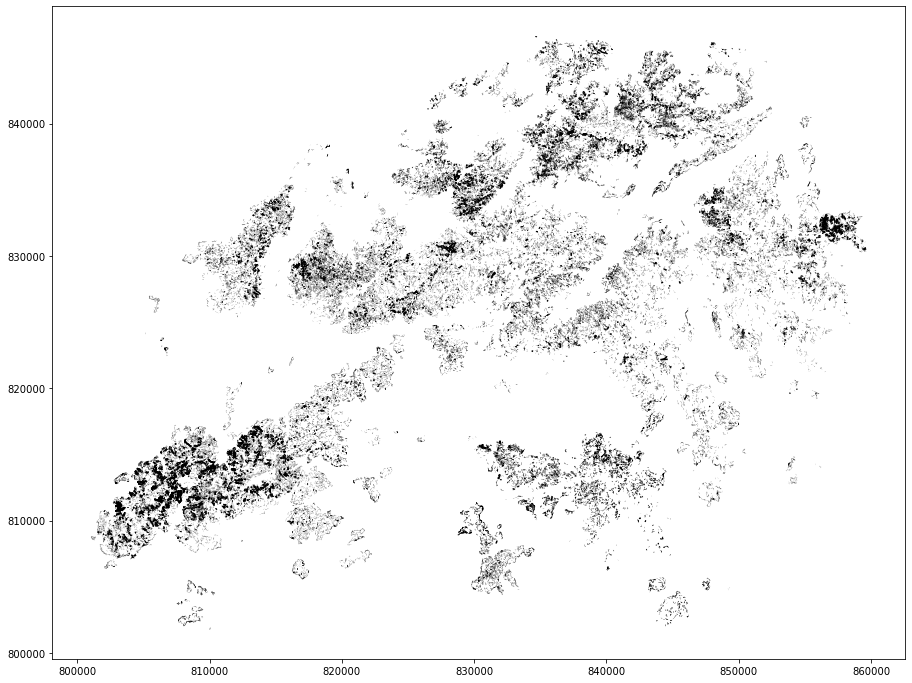

In [17]:
#density of landslides
landslide_data.plot(figsize=[18, 12], color='black',edgecolor = 'black')

plt.show()